In [1]:
from utilities.plot_utils import *
def learn(agent):
    agent.train(1000)
    plot_episode_rewards(agent.episode_rewards, 'Ant: Episode Rewards - Training')
    plt.show()
    plot_actor_critic_losses(agent.actor_losses, agent.critic_losses)
    plt.show()
    agent.save_model_weights("ant", "td3")

def test(agent):
    agent.test(10)
    plot_episode_rewards(agent.test_rewards, 'Ant: Episode Rewards - Testing')
    plt.show()
    # agent.save_plot_data("highway", "ddpg", "test_rewards", agent.test_rewards)

def visualize(agent, env):
    agent.change_environment(env)
    agent.visualize(1)

In [2]:
import gymnasium as gym
from td3.td3 import td3

params = {
    'gamma': 0.99,              # discount factor
    'alpha_critic': 0.0001,     # learning rate for critic net
    'alpha_actor': 0.001,       # learning rate for actor network
    'buffer_size': 10000,       # Size of Replay Buffer
    'batch_size' : 100,         # Mini Batch Size for Back Prop
    'tau':         0.001,       # Percentage of new values to update target network with
    'update_rate': 100,         # Update network every n steps
    'noise_scale' : 0.1,        # Standard Deviation of Gausian Noise
    "actor_update_frequency": 2,# How often to update the actor network, every n updates
}

env = gym.make("Ant-v4")
agent = td3(env, params)

/usr/lib/python3/dist-packages/pythran/tables.py:4520: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, method):
/usr/lib/python3/dist-packages/pythran/tables.py:4553: FutureWarning: In the future `np.bytes` will be defined as the corresponding NumPy scalar.
  obj = getattr(themodule, elem)


Action Count: 8, Max Action: 1.0, Min Action: -1.0
State Shape: 27


In [3]:
# Fill buffer
state, info = env.reset()
for _ in range(10000):
    action = env.action_space.sample()
    next_state, reward, terminated, truncated, info = env.step(action)
    agent.buffer.add(state, action, reward, next_state, terminated)
    state = next_state

Episode 0 reward: 964.28
Episode 10 reward: -1593.87
Episode 20 reward: -1178.05
Episode 30 reward: -1428.54
Episode 40 reward: -1028.97
Episode 50 reward: -2245.45
Episode 60 reward: 408.82
Episode 70 reward: -1053.4
Episode 80 reward: -188.16
Episode 90 reward: -111.47
Episode 100 reward: -51.35
Episode 110 reward: -34.53
Episode 120 reward: -47.39
Episode 130 reward: -13.24
Episode 140 reward: -103.71
Episode 150 reward: -18.85
Episode 160 reward: -132.27
Episode 170 reward: -30.94
Episode 180 reward: -33.76
Episode 190 reward: -190.72
Episode 200 reward: -71.63
Episode 210 reward: -87.08
Episode 220 reward: -231.74
Episode 230 reward: -53.4
Episode 240 reward: -25.77
Episode 250 reward: -67.74
Episode 260 reward: -110.76
Episode 270 reward: -4.26
Episode 280 reward: -171.75
Episode 290 reward: -34.46
Episode 300 reward: -21.88
Episode 310 reward: -31.23
Episode 320 reward: -90.88
Episode 330 reward: -7.68
Episode 340 reward: -31.09
Episode 350 reward: -19.87
Episode 360 reward: -19

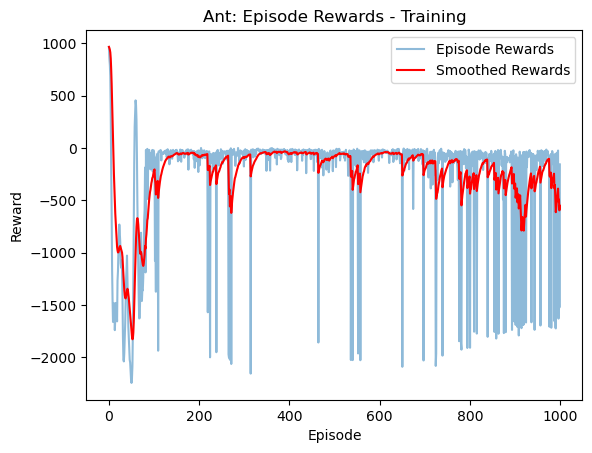

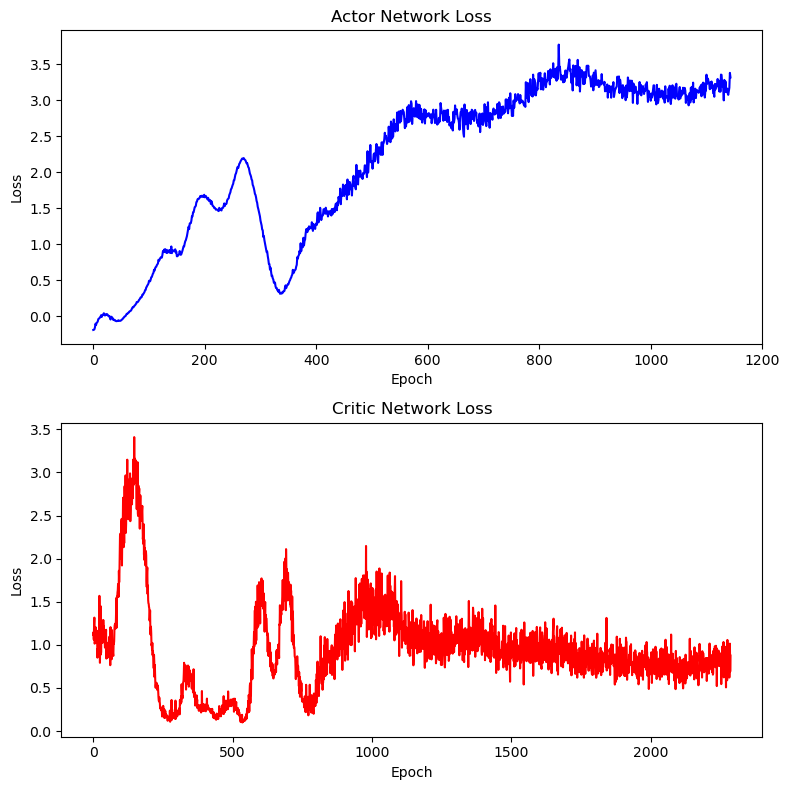

In [4]:
learn(agent)


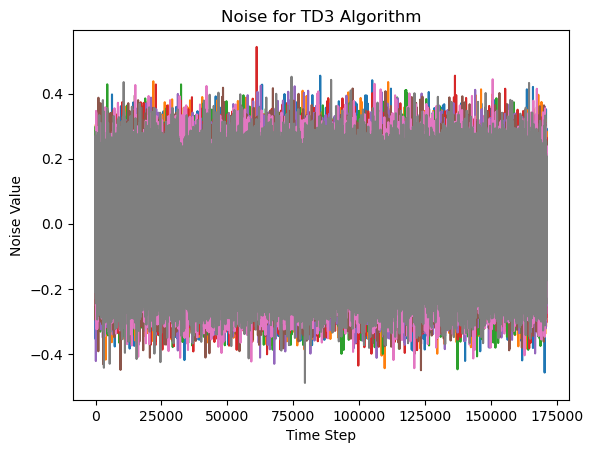

In [5]:
plt.plot(agent.noise_arr)
plt.xlabel('Time Step')
plt.ylabel('Noise Value')
plt.title('Noise for TD3 Algorithm')
plt.show()

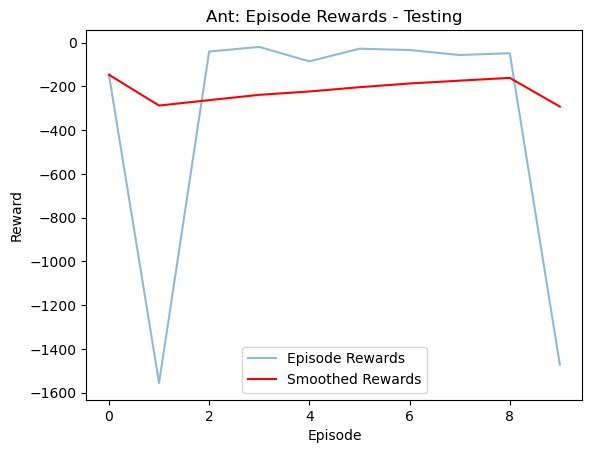

In [6]:
test(agent)

In [7]:
from utilities.plot_utils import *
# plot_data = load_plot_data("pendulum", "td3", "plot_data")
plot_dict = {
        "episode_rewards" : agent.episode_rewards,
        "actor_losses"    : agent.actor_losses,
        "critic_losses"   : agent.critic_losses,
        "test_rewards"    : agent.test_rewards
    }
save_plot_data("ant", "td3", "plot_data", plot_dict)

td3 Results saved to '/home/seancour/Documents/DL/ant/td3/ant_td3_plot_data.pkl'
